In [178]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



In [179]:
ca = pd.read_csv('dogma5.csv')



In [180]:
X = ca.drop(columns=[ca.columns[0], ca.columns[-1]])  # Признаки (все, кроме первого и последнего столбца)
y_class = ca.iloc[:, 0]  # Первая целевая переменная (покупка или нет)
y_reg = ca.iloc[:, -1]

In [181]:
print(X.isnull().sum())  # Количество пропусков в признаках
print(y_class.isnull().sum())  # Количество пропусков в первой целевой переменной
print(y_reg.isnull().sum()) 

0.0.4                 4865
1.0                    540
1.0.1                    0
0.0.10                4865
1.0.2                  541
                      ... 
274.6188739789965        0
271.6085180863477        0
273.10719564371834       0
7062679.317856605        0
6920071.582174959        0
Length: 72, dtype: int64
0
0


In [182]:
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X)

In [183]:
y_class = y_class.map({'yes': 1, 'no': 0})

In [184]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


In [185]:
ca = ca.dropna(subset=[ca.columns[0], ca.columns[-1]])

In [186]:
y_class = y_class.values

In [187]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)  # Еще раз масштабируем признаки

# Проверим, что данных теперь нет пропусков
print(pd.isnull(X_scaled).sum())  # Для признаков

0


In [188]:
ca = ca.dropna(subset=[ca.columns[0], ca.columns[-1]])

# Переприсвоим X_scaled и y_class
X_scaled = ca.drop([ca.columns[0], ca.columns[-1]], axis=1).values
y_class = ca[ca.columns[0]].values  # Или, если первый столбец - это 
print("Количество пропусков в y_class:", pd.isnull(y_class).sum())

Количество пропусков в y_class: 0


In [189]:
ca_cleaned = ca.dropna(axis=1)

# Преобразуем X и y
X_cleaned = ca_cleaned.drop([ca_cleaned.columns[0], ca_cleaned.columns[-1]], axis=1).values
y_class_cleaned = ca_cleaned[ca_cleaned.columns[0]].values  # Целевая переменная - первый столбец

# Проверим, что пропусков больше нет
print("Количество пропусков в X_cleaned:", pd.isnull(X_cleaned).sum())
print("Количество пропусков в y_class_cleaned:", pd.isnull(y_class_cleaned).sum())

# Обучим модель


Количество пропусков в X_cleaned: 0
Количество пропусков в y_class_cleaned: 0


In [190]:
print(y_class_cleaned.dtype)

float64


In [191]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Обучение модели
model_class = LinearRegression()
model_class.fit(X_scaled, y_class_cleaned)

LinearRegression()

In [192]:
print(pd.DataFrame(X_scaled).isna().sum())  # Количество NaN по столбцам
print(np.any(np.isnan(X_scaled)))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64
False


In [193]:
X_scaled_cleaned = pd.DataFrame(X_scaled).dropna(axis=0)

# Если хотите удалить столбцы с NaN:
X_scaled_cleaned = pd.DataFrame(X_scaled).dropna(axis=1)

In [194]:
X_scaled_cleaned = pd.DataFrame(X_scaled).dropna()

# Проверим, что NaN больше нет
print("Содержит ли NaN после удаления:", X_scaled_cleaned.isna().any().any())

Содержит ли NaN после удаления: False


In [195]:
y_pred = model_class.predict(X_scaled)

In [196]:
mse = mean_squared_error(y_class, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Squared Error (MSE): 3682019.7436


In [204]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_class, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.4f}')

print(f"Минимальное значение целевой переменной: {y_class_cleaned.min()}")
print(f"Максимальное значение целевой переменной: {y_class_cleaned.max()}")

Mean Absolute Error (MAE): 1608.8879
Минимальное значение целевой переменной: 1.0
Максимальное значение целевой переменной: 7994.0


In [199]:
r2 = r2_score(y_class, y_pred)
print(f'R²: {r2:.4f}')

R²: 0.0330


In [200]:
model_reg = LinearRegression()
model_reg.fit(X_scaled, y_reg)


LinearRegression()

In [201]:
y_pred_reg = model_reg.predict(X_scaled)

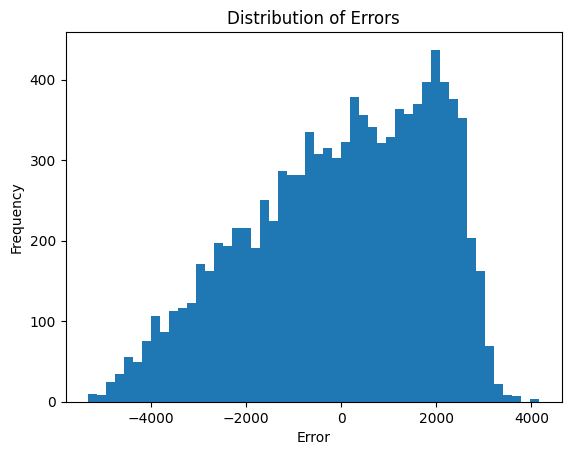

In [203]:
errors = y_pred - y_class_cleaned
plt.hist(errors, bins=50)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()